# EDA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('EDA AND MACCHINE LEARNING.csv')

In [3]:
df.head()

,S.No,Rental Price,Address,City,Bedrooms,Bathrooms,Total floors,Car parking,Bachelors allowed,Area,Furnishing,Type,Maintenance
0,1,"₹ 15,000",House near chenkotukonm 15 thousand,Kerala,3,3,2,2,No,2000,Furnished,Houses & Villas,200
1,2,"₹ 25,000",Beautiful house for rent(Families preferred),Kerala,3,3,2,Lathanivas,No,2500,Semi-Furnished,Houses & Villas,1
2,3,"₹ 35,000",Kudappanakunnu mukkolkkal Nalachira,Kerala,4,4+,2,2,No,2500,Furnished,Houses & Villas,2500
3,4,"₹ 17,000",for rent ground floor,Kerala,2,2,0,1,No,2000,Semi-Furnished,Houses & Villas,0
4,5,"₹ 10,00,000",House lease kureepuzha,Kerala,3,3,2,1,No,2000,Unfurnished,Houses & Villas,1000000


In [4]:
df.columns

Index(['S.No', ' Rental Price', 'Address', 'City', 'Bedrooms', 'Bathrooms',
       'Total floors', 'Car parking', 'Bachelors allowed', 'Area',
       'Furnishing', 'Type', 'Maintenance'],
      dtype='object')

# Statistical Analysis

In [5]:
df.duplicated().sum()

0

In [6]:
df.isin([' ?']).sum()

S.No                 0
 Rental Price        0
Address              0
City                 0
Bedrooms             0
Bathrooms            0
Total floors         0
Car parking          0
Bachelors allowed    0
Area                 0
Furnishing           0
Type                 0
Maintenance          0
dtype: int64

In [7]:
df= df.replace(' ?',np.NaN)

In [8]:
df.isin([' ', 'NA','-']).sum().any()

False

In [9]:
df.drop_duplicates(keep = 'last', inplace=True)

In [10]:
df.shape

(5060, 13)

# Missing Value Check

<AxesSubplot:>

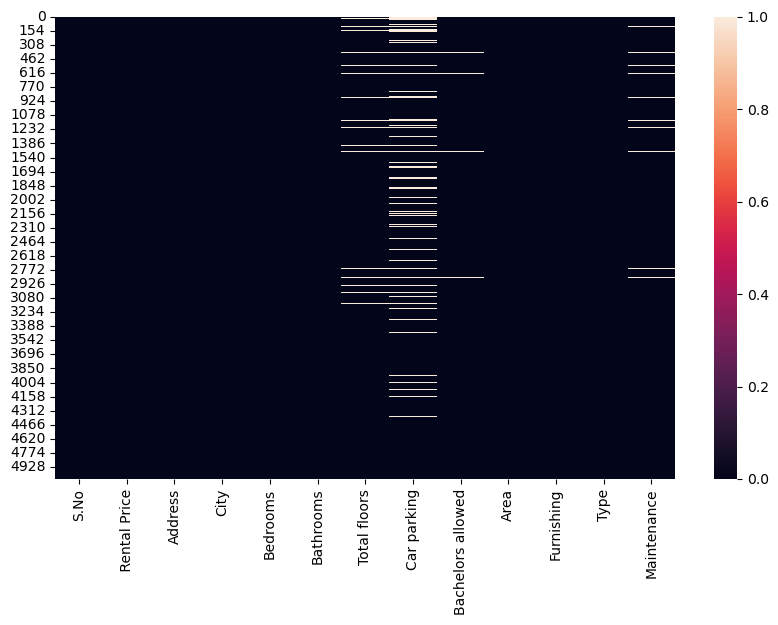

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys = ['Missing Values', '%Missing data']))

                   Missing Values  %Missing data
Car parking                   637      12.588933
Total floors                  251       4.960474
Maintenance                   156       3.083004
Bachelors allowed              69       1.363636
Area                            4       0.079051
 Rental Price                   1       0.019763
Address                         1       0.019763
Bedrooms                        1       0.019763
Bathrooms                       1       0.019763
Furnishing                      1       0.019763
Type                            1       0.019763
S.No                            0       0.000000
City                            0       0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               5060 non-null   int64 
 1    Rental Price      5059 non-null   object
 2   Address            5059 non-null   object
 3   City               5060 non-null   object
 4   Bedrooms           5059 non-null   object
 5   Bathrooms          5059 non-null   object
 6   Total floors       4809 non-null   object
 7   Car parking        4423 non-null   object
 8   Bachelors allowed  4991 non-null   object
 9   Area               5056 non-null   object
 10  Furnishing         5059 non-null   object
 11  Type               5059 non-null   object
 12  Maintenance        4904 non-null   object
dtypes: int64(1), object(12)
memory usage: 514.0+ KB


# Exploratory Data Analysis

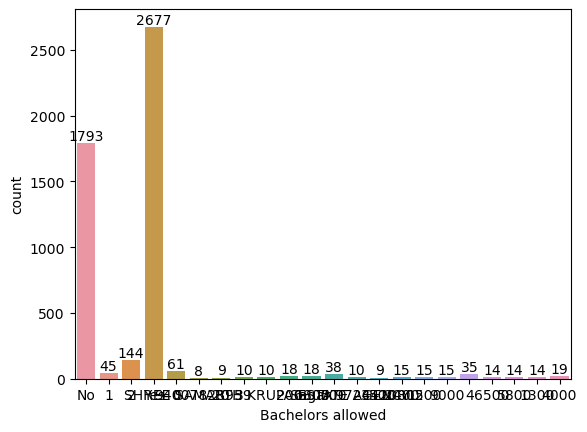

In [17]:
ax = sns.countplot(x = 'Bachelors allowed',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_gen = df.groupby(['City'], as_index=False)['Rental Price'].sum().sort_values(by='Rental Price', ascending=False)

sns.barplot(x = 'City',y= 'Rental Price' ,data = sales_gen)

# Area

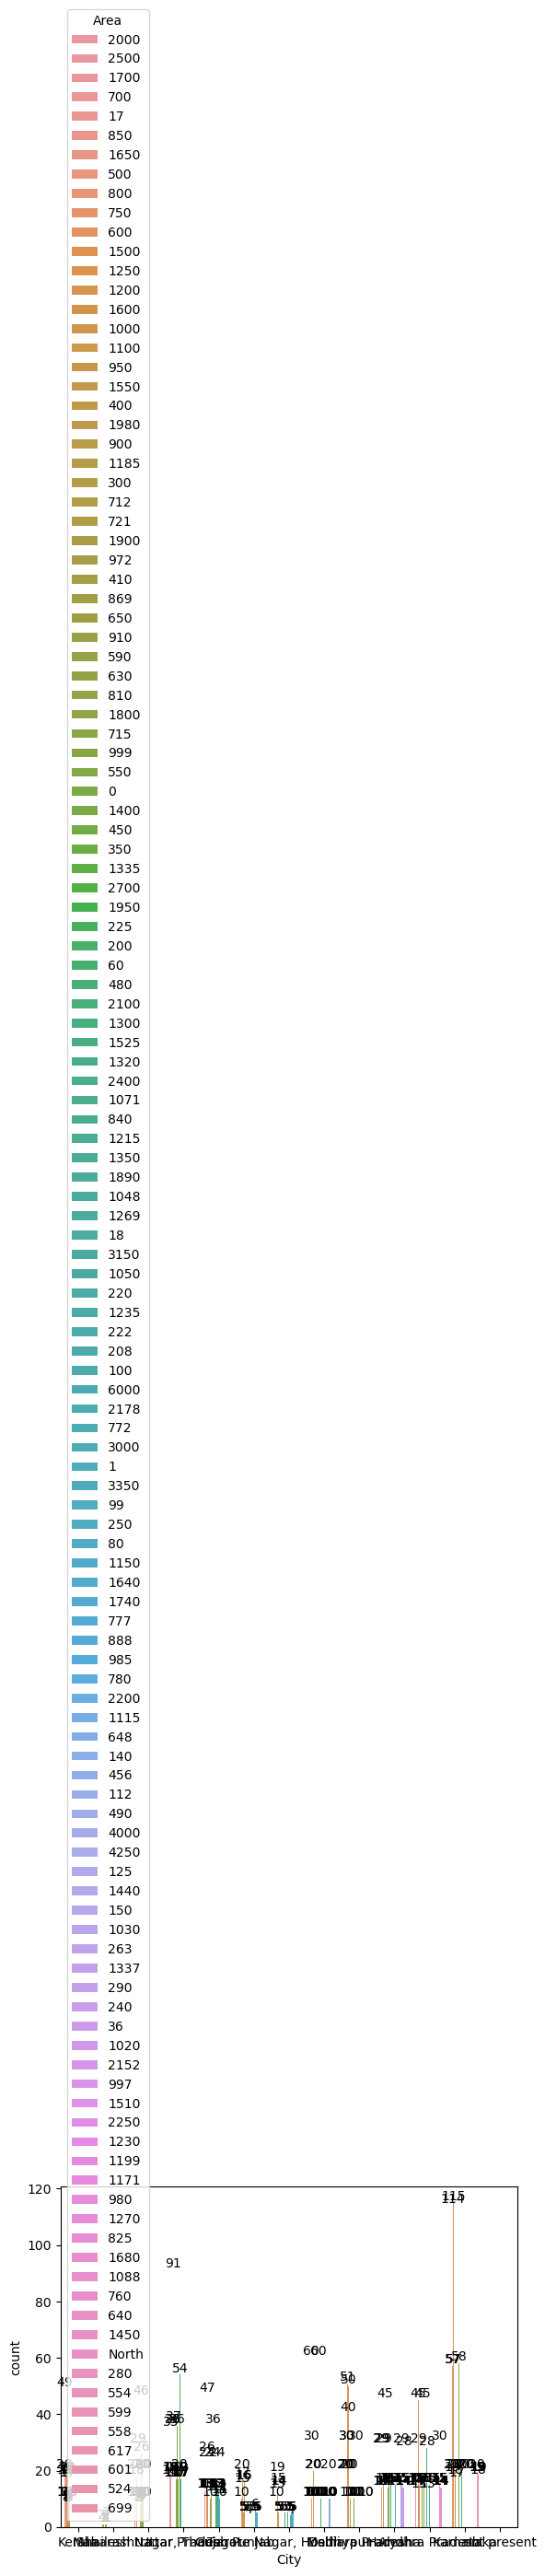

In [19]:
ax = sns.countplot(data = df, x = 'City', hue = 'Area')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_age = df.groupby(['bedrooms'], as_index=False)['Total floors'].sum().sort_values(by='Total floors', ascending=False)

sns.barplot(x = 'Bedrooms',y= 'Total floors' ,data = sales_age)

## City

In [ ]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'City',y= 'Orders')

In [ ]:
sales_state = df.groupby(['City'], as_index=False)['Rental Price'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'City',y= 'Rental Price')

## Parking

In [24]:
ax = sns.countplot(data = df, x = 'Car parking')

sns.set(rc={'figure.figsize':(130,150)})
for bars in ax.containers:
    ax.bar_label(bars)

In [25]:
ax = sns.countplot(data = df, x = 'Bachelors allowed')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

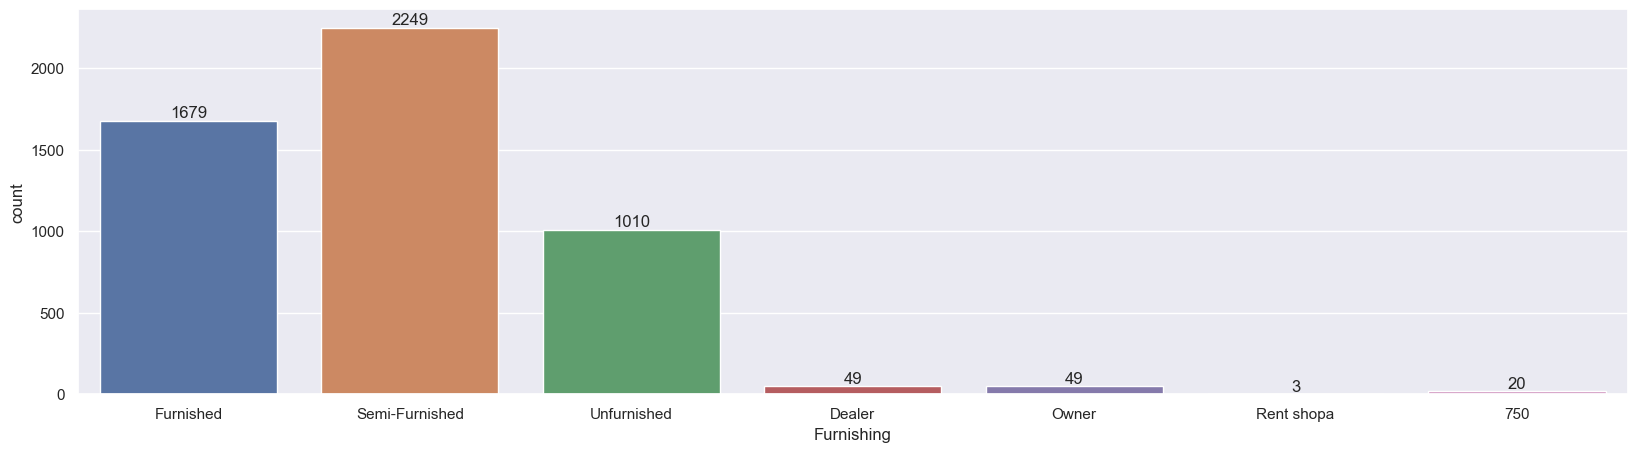

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Furnishing')

for bars in ax.containers:
    ax.bar_label(bars)

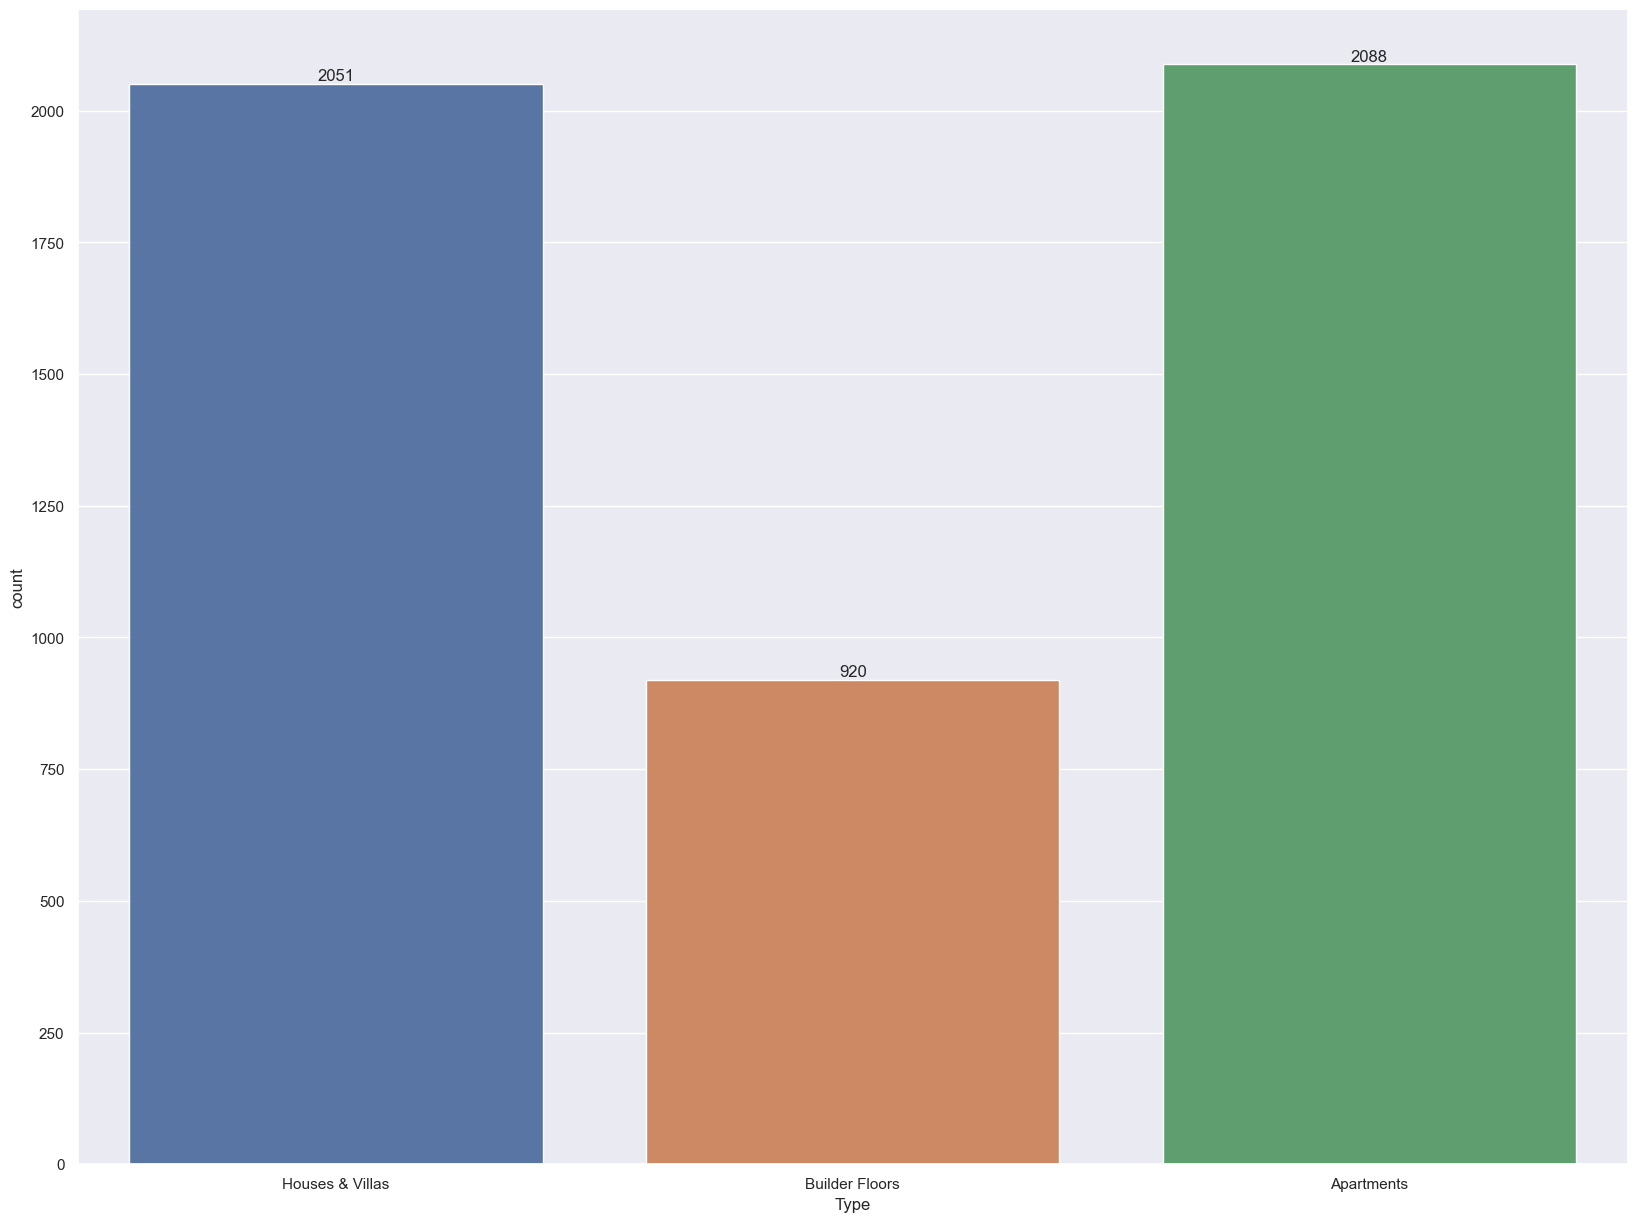

In [27]:
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.countplot(data = df, x = 'Type')

for bars in ax.containers:
    ax.bar_label(bars)

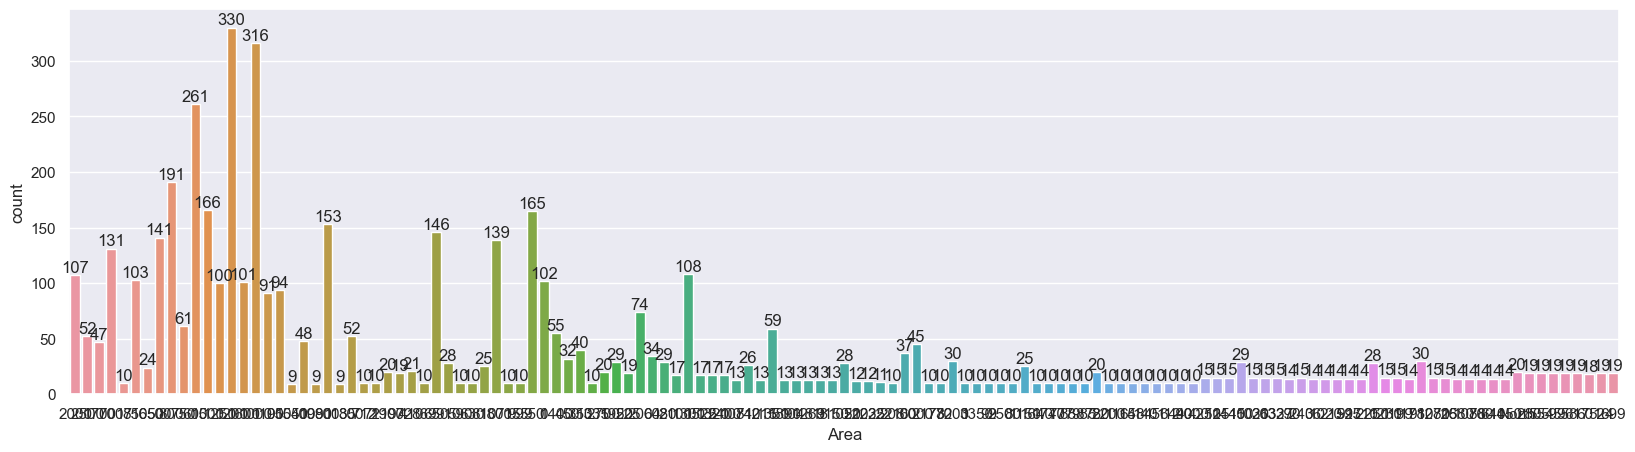

In [28]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Area')

for bars in ax.containers:
    ax.bar_label(bars)

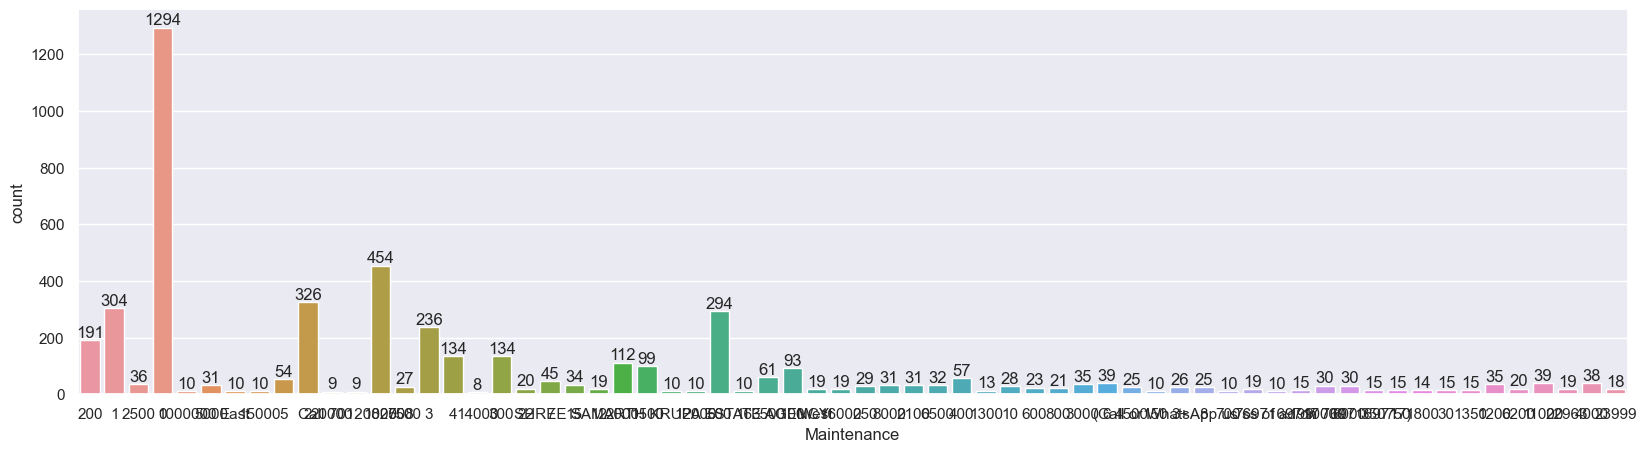

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Maintenance')

for bars in ax.containers:
    ax.bar_label(bars)

### Outliers removal using Zscore method

In [58]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold= 3
df1= df[(z<3).all(axis = 1)]

print('Shape of the dataframe before removig outliers:',df.shape)
print('Shape of the dataframe after removig outliers:',df1.shape)
print('Percentage of data loss post outliers removal :',(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df = df1.copy()

Shape of the dataframe before removig outliers: (32536, 13)
Shape of the dataframe after removig outliers: (28061, 13)
Percentage of data loss post outliers removal : 13.753995574133269


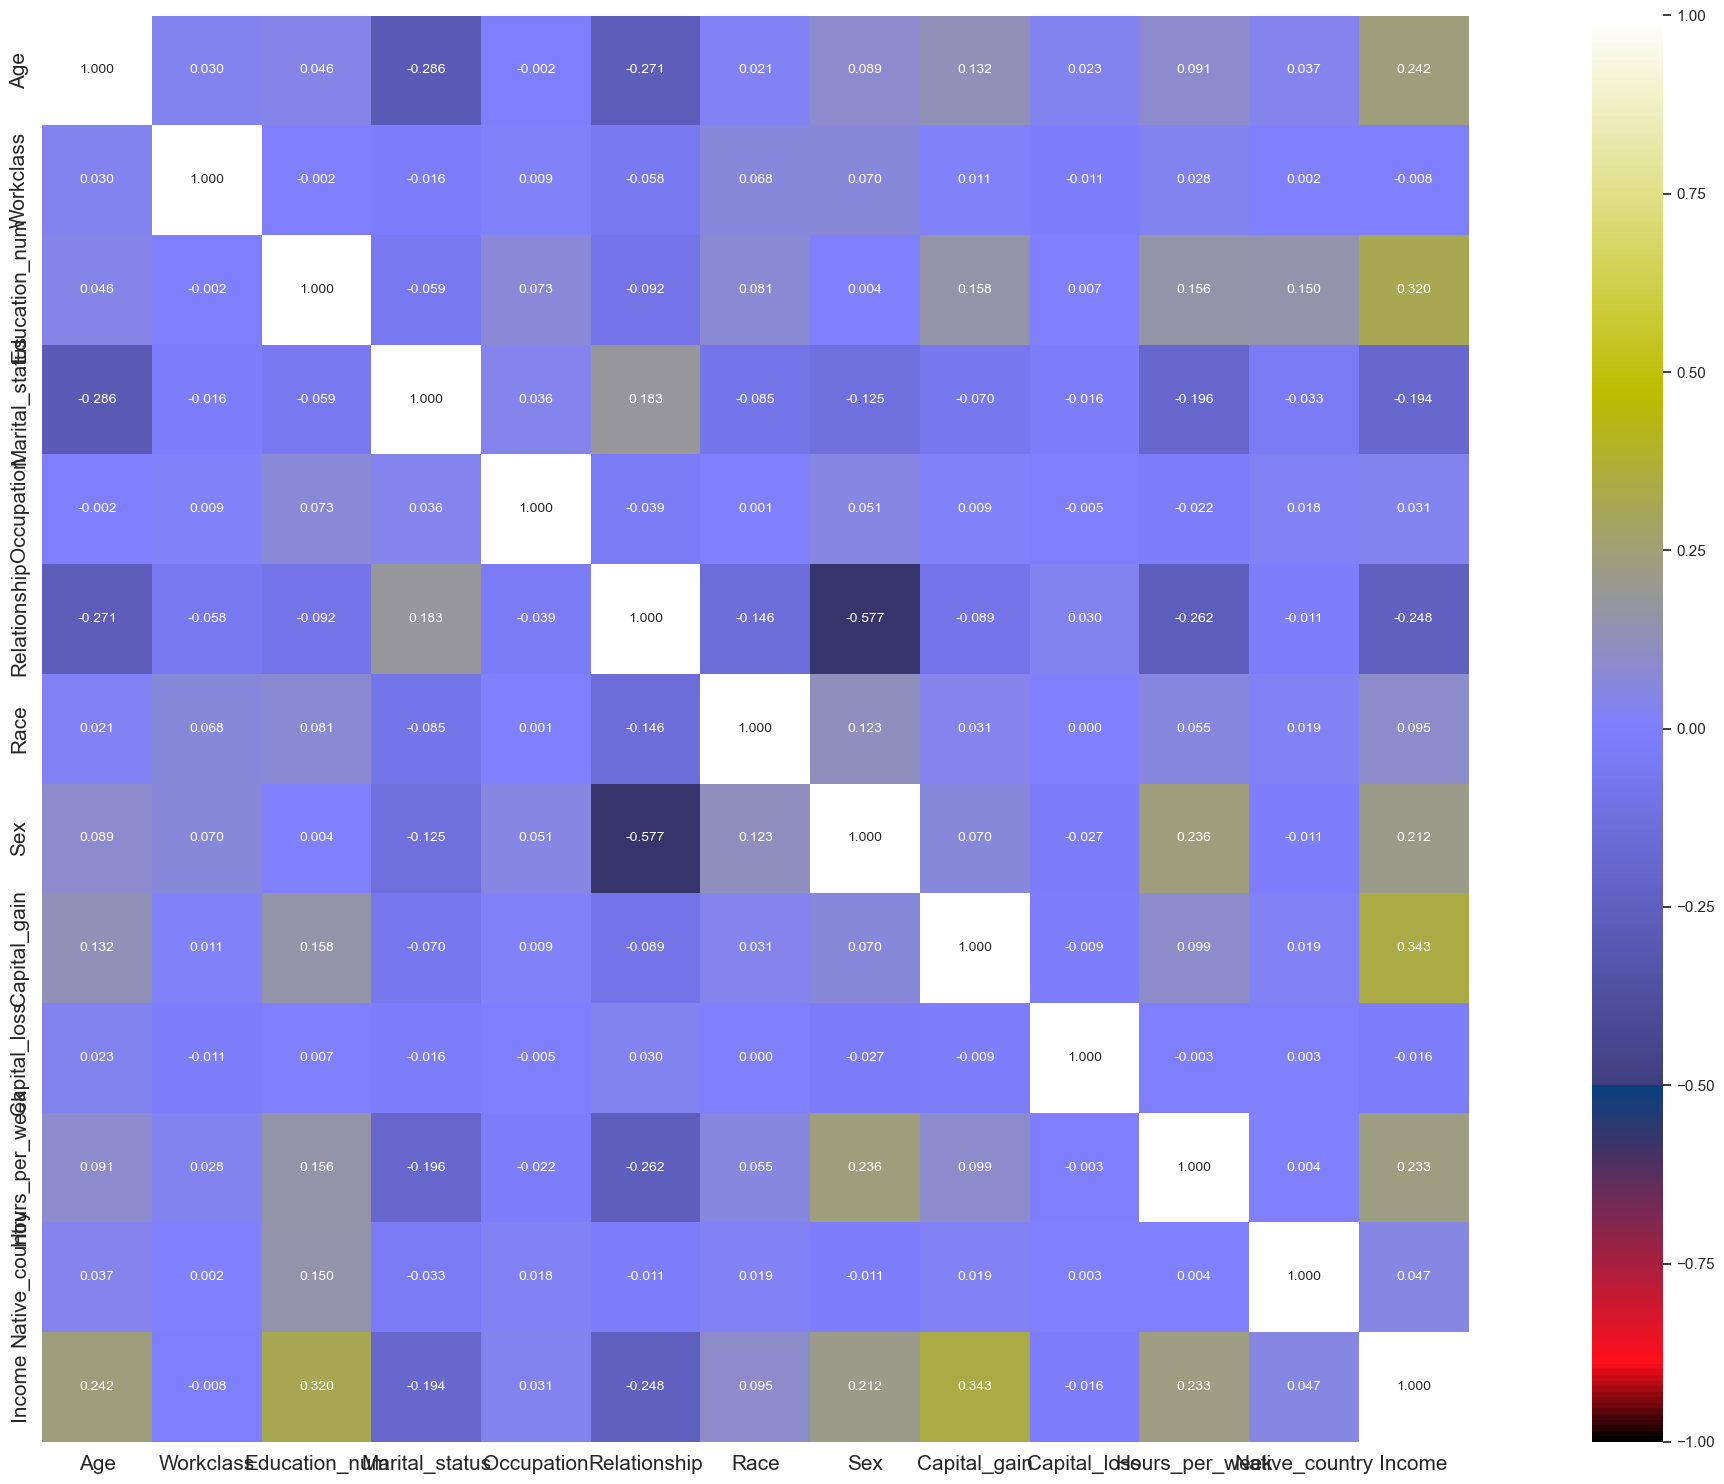

In [63]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',annot_kws={'size':10}, cmap='gist_stern')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Standard Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# PCA

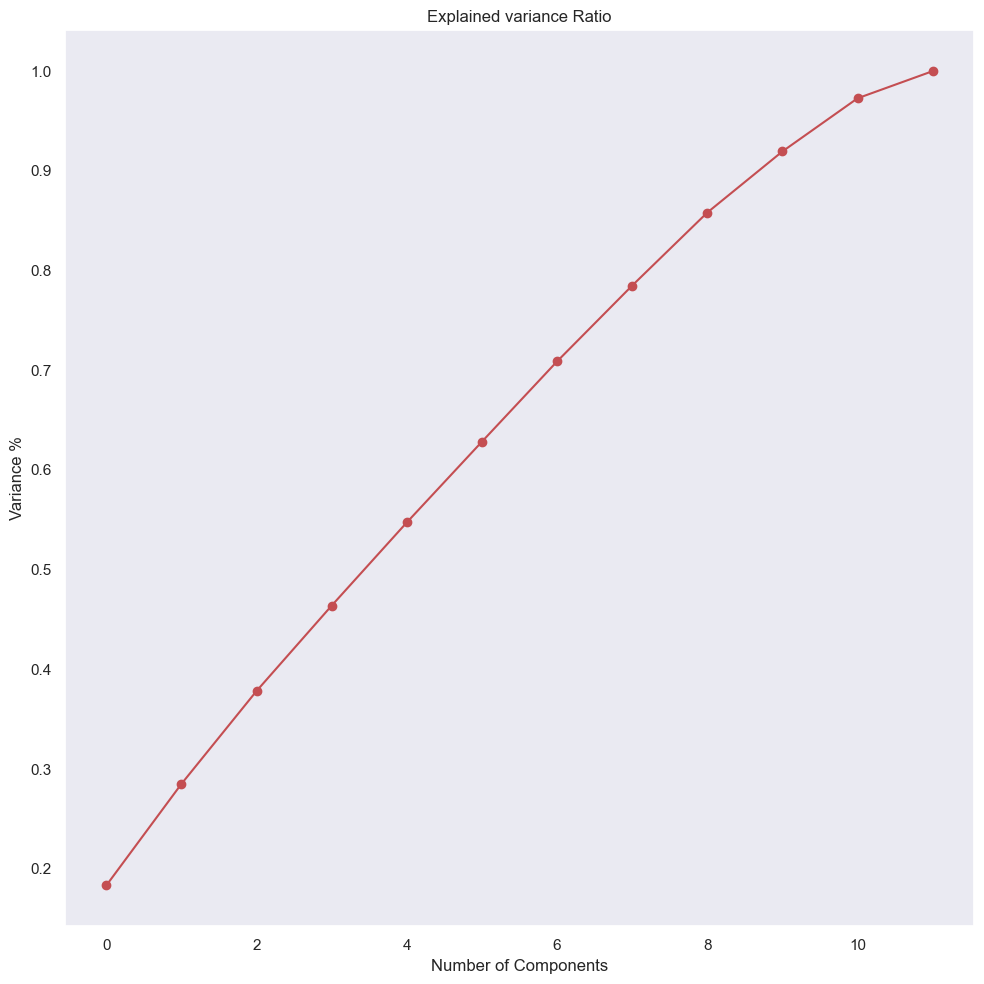

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [73]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [74]:
principle_x = pd.DataFrame(x_new,columns = np.arange(9))

# Machine Learnings Model Building

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training feature matrix size:', X_train.shape)
print('Training target vector size:', Y_train.shape)
print('Test feature matrix size:', X_test.shape)
print('Test target vector size:', Y_test.shape)

Training feature matrix size: (30473, 12)
Training target vector size: (30473,)
Test feature matrix size: (13061, 12)
Test target vector size: (13061,)


## finding best Random state

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.777811806140418 on Random_state 29


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=29, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7755148916622004


Confusion matrix of Logistics Regression : 
 [[5009 1527]
 [1405 5120]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      6536
           1       0.77      0.78      0.78      6525

    accuracy                           0.78     13061
   macro avg       0.78      0.78      0.78     13061
weighted avg       0.78      0.78      0.78     13061



In [85]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    
    model.fit(x_train, Y_train)
    y_pred= model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test, y_pred))
    rmse_val.append(error)
    print('RMSE value for k = ', K , 'is:', error)

RMSE value for k =  1 is: 0.7100512150322412
RMSE value for k =  2 is: 0.710266839457203
RMSE value for k =  3 is: 0.707187984714044
RMSE value for k =  4 is: 0.710266839457203
RMSE value for k =  5 is: 0.7111286833531423
RMSE value for k =  6 is: 0.7121507683001156
RMSE value for k =  7 is: 0.7112363404097508
RMSE value for k =  8 is: 0.7098355251077532
RMSE value for k =  9 is: 0.7083779003290572
RMSE value for k =  10 is: 0.7101590354284335
RMSE value for k =  11 is: 0.7092960133439309
RMSE value for k =  12 is: 0.7127418317776719


In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

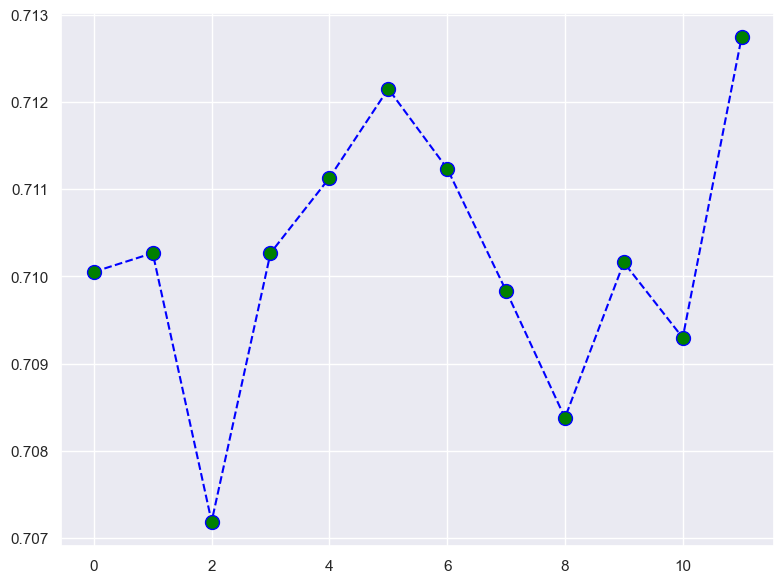

In [86]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle= 'dashed', marker= 'o', markerfacecolor= 'green', markersize=10)

In [89]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('===========================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8362299977030855


Confusion matrix : 
 [[5099 1437]
 [ 702 5823]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      6536
           1       0.80      0.89      0.84      6525

    accuracy                           0.84     13061
   macro avg       0.84      0.84      0.84     13061
weighted avg       0.84      0.84      0.84     13061



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7774289870607151


Confusion matrix : 
 [[4850 1686]
 [1221 5304]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      6536
           1       0.76      0.81      0.78      6525

    accuracy                           0.78     13061
   macro avg       0.78      0.78      0.78     13061
weighted avg       0.78      0.78      0.78     

# Cross validation

In [90]:
from sklearn.model_selection import cross_val_score
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Valdation Score', m, ':'+'\033[0m\n]')
    print('Score :' , score)
    print('Mean Score:', score.mean())
    print('Std deviation :', score.std())
    print('\n')
    print('==================================================================')



Cross Valdation Score SVC() :
]
Score : [0.81290915 0.82221201 0.82577237 0.83461583 0.83712382]
Mean Score: 0.8265266365871747
Std deviation : 0.008744782261576893




Cross Valdation Score GaussianNB() :
]
Score : [0.70690249 0.72183301 0.72860917 0.7147123  0.72719963]
Mean Score: 0.7198513196194427
Std deviation : 0.008108098353671173




Cross Valdation Score DecisionTreeClassifier() :
]
Score : [0.78879063 0.81405765 0.83817618 0.83323762 0.83161038]
Mean Score: 0.8211744943237314
Std deviation : 0.018126491179713107




Cross Valdation Score KNeighborsClassifier(n_neighbors=3) :
]
Score : [0.8091191  0.84035833 0.85103939 0.8595383  0.85527223]
Mean Score: 0.8430654708217767
Std deviation : 0.018130787191655274




Cross Valdation Score RandomForestClassifier() :
]
Score : [0.83289307 0.85069484 0.86734811 0.87860342 0.86917069]
Mean Score: 0.8597420275798067
Std deviation : 0.01615686950272866




Cross Valdation Score ExtraTreesClassifier() :
]
Score : [0.83059607 0.85253245

## Hyper Parameter Tunning: GridSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameter = {'criterion': ['gini', 'entropy'],
            'min_samples_split':[3,5,8],
            'max_depth' : [20,30,40,],
            'n_estimators': [100,150,200],
            }

In [95]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.874 total time=   4.3s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.868 total time=   4.3s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.876 total time=   3.8s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.876 total time=   4.2s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [101]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 200}

## Final Model

In [98]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split =8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8784932241022892


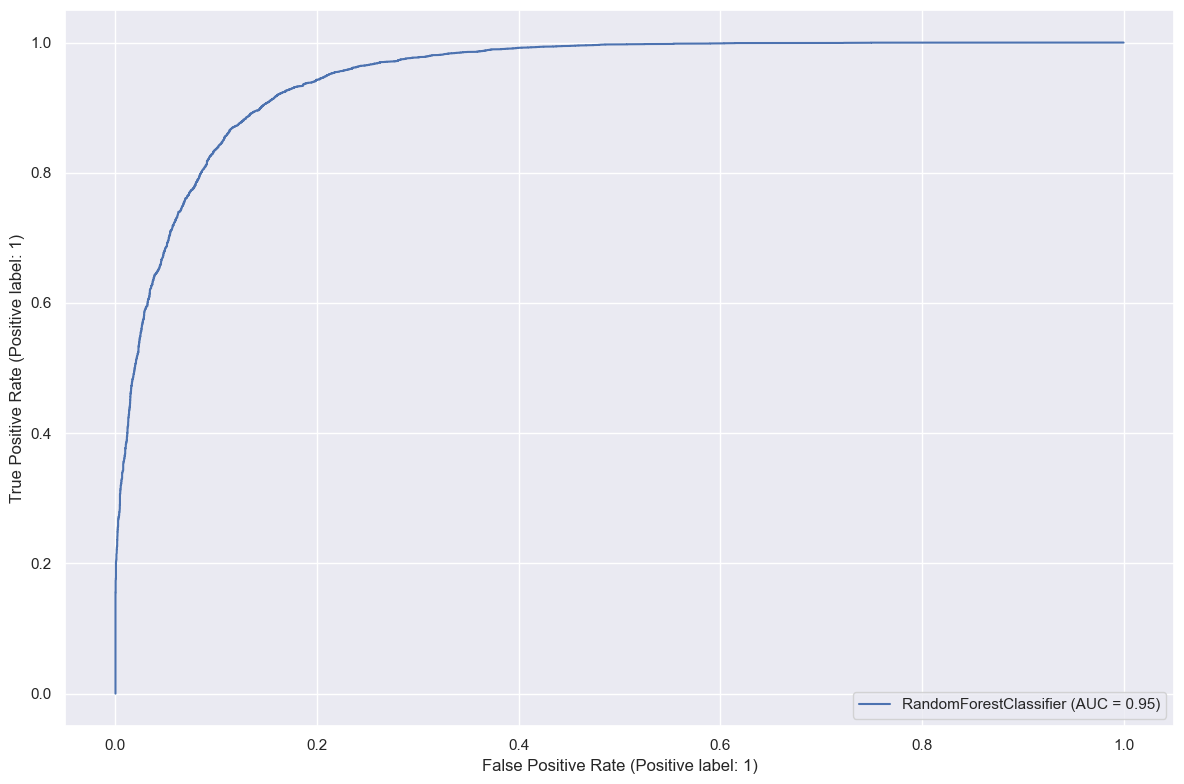

<Figure size 1000x1000 with 0 Axes>

Auc Score :
] 0.8785217035505095


In [99]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test, Y_test)
plt.legend(prop= {'size':11}, loc= 'lower right')
plt.figure(figsize = (10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n]', auc_score)

## Saving Model

In [ ]:
import joblib 
joblib.dump(Final_mod,'EDA and machine learning.pkl')